<h1> 1st Function 

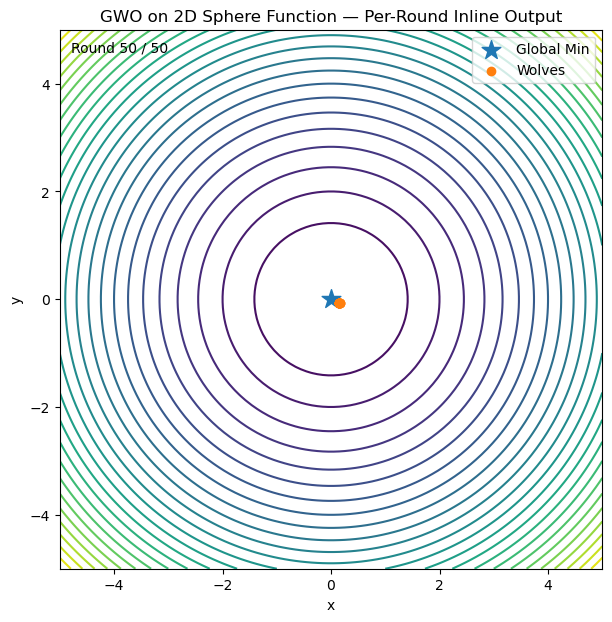

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import display, clear_output

# กำหนดค่าพื้นฐาน
n_rounds = 50
n_wolves = 20
dim = 30
domain = [-5, 5]

def f(pos):
    return np.sum(pos**2)

# สุ่มตำแหน่งหมาป่า
rng = np.random.default_rng(0)
wolves = [rng.uniform(domain[0], domain[1], dim) for _ in range(n_wolves)]

# ประวัติตำแหน่งแต่ละรอบ
positions_history = []

for k in range(n_rounds):
    sorted_idx = sorted(range(n_wolves), key=lambda i: f(wolves[i]))
    X_alpha, X_beta, X_delta = wolves[sorted_idx[0]], wolves[sorted_idx[1]], wolves[sorted_idx[2]]

    # เก็บตำแหน่งก่อนอัปเดตในรอบนี้
    positions_history.append(np.array(wolves))

    # อัปเดตหมาป่า
    for i in range(n_wolves):
        X = wolves[i]
        C1, C2, C3 = rng.uniform(0, 2, dim), rng.uniform(0, 2, dim), rng.uniform(0, 2, dim)
        lower, upper = -1 + k / n_rounds, 1 - k / n_rounds
        A1, A2, A3 = rng.uniform(lower, upper, dim), rng.uniform(lower, upper, dim), rng.uniform(lower, upper, dim)
        D_alpha = np.abs(C1 * X_alpha - X)
        D_beta  = np.abs(C2 * X_beta  - X)
        D_delta = np.abs(C3 * X_delta - X)
        X1 = X_alpha - A1 * D_alpha
        X2 = X_beta  - A2 * D_beta
        X3 = X_delta - A3 * D_delta
        X_new = (X1 + X2 + X3) / 3
        wolves[i] = np.clip(X_new, domain[0], domain[1])

# -------------------------------
# เตรียมพื้นผิว contour
x = np.linspace(domain[0], domain[1], 100)
y = np.linspace(domain[0], domain[1], 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

# -------------------------------
# แสดงผลแบบ "อัปเดตใน output เดียว" ทีละรอบ
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_xlim(domain[0], domain[1])
ax.set_ylim(domain[0], domain[1])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("GWO on 2D Sphere Function — Per-Round Inline Output")

# วาด contour คงที่
ax.contour(X, Y, Z, levels=30)

# จุด global minimum
ax.scatter([0], [0], marker='*', s=200, label='Global Min')

# สร้าง scatter สำหรับหมาป่า (เฟรมแรก)
scat = ax.scatter(positions_history[0][:, 0], positions_history[0][:, 1], label="Wolves")

txt = ax.text(0.02, 0.98, f"Round 1 / {len(positions_history)}", transform=ax.transAxes,
              ha="left", va="top")
ax.legend(loc="upper right")

# วนแสดงรายรอบ
for t, pos in enumerate(positions_history, start=1):
    scat.set_offsets(pos[:, :2])
    txt.set_text(f"Round {t} / {len(positions_history)}")
    clear_output(wait=True)
    display(fig)
    plt.pause(0.001)  # ให้ matplotlib วาดเฟรม
    time.sleep(0.25)     # ดีเลย์ ~1 วินาที

plt.close(fig)